In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size': 24, 'font.weight':'bold'})
plt.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [2]:
def EXP(num):
    Bases=[np.random.choice(['x','+'],num),np.random.choice([0,1],num),np.random.choice(['x','+'],num),np.random.choice(['x','+'],num)]
    string = '-------------------------\n'
    string += '| Alice\t| Eve\t| Bob\t|\n'
    for i in range(len(Bases[0])):
        string+=f'|{i+3}-{Bases[0][i]}{Bases[1][i]}\t|{i+3}-{Bases[2][i]}\t|{i+3}-{Bases[3][i]}\t|\n'
    string += '-------------------------\n'
    return string,Bases

def lstDiff(list1,list2):
    diff = []
    for j in range(len(list1)):
        diff.append(0)
        for i in range(len(list1[j])):
            if list1[j][i]!=list2[j][i]:
                diff[-1]+=1
    return diff

In [3]:
np.random.seed(0)
part1=EXP(168)
with open('Part I.txt','w') as f:
    f.write(part1[0])

In [4]:
np.random.seed(1)
part2=EXP(168)
with open('Part II.txt','w') as f:
    f.write(part2[0])

In [4]:
bob1 = pd.read_excel('Data.xlsx', sheet_name='Part I').iloc[:,0].dropna()
bob1 = np.array([part1[1][3],np.array(bob1, dtype=int)])
alice1 = np.array(part1[1][0:2])
keys = [''.join(bob1[1,:18][bob1[0,:18]==alice1[0,:18]]),''.join(bob1[1,18:68][bob1[0,18:68]==alice1[0,18:68]]),
       ''.join(bob1[1,68:][bob1[0,68:]==alice1[0,68:]])]
print(keys)

NameError: name 'part1' is not defined

In [10]:
bob2 = pd.read_excel('Data.xlsx', sheet_name='Part II').iloc[:,0].dropna()
eve = pd.read_excel('Data.xlsx', sheet_name='Part II').iloc[:,1].dropna()
bob2 = np.array([part2[1][3],np.array(bob2, dtype=int)])
eve = np.array([part2[1][2],np.array(eve, dtype=int)])
alice2 = np.array(part2[1][0:2])
bobKeys= [''.join(bob2[1,:18][bob2[0,:18]==alice2[0,:18]]),''.join(bob2[1,18:68][bob2[0,18:68]==alice2[0,18:68]]),
       ''.join(bob2[1,68:][bob2[0,68:]==alice2[0,68:]])]
aliceKeys= [''.join(alice2[1,:18][bob2[0,:18]==alice2[0,:18]]),''.join(alice2[1,18:68][bob2[0,18:68]==alice2[0,18:68]]),
       ''.join(alice2[1,68:][bob2[0,68:]==alice2[0,68:]])]
keydiff = lstDiff(aliceKeys,bobKeys)
print(aliceKeys)
print(bobKeys)
print([keydiff[i] for i in range(len(aliceKeys))])
print([len(aliceKeys[i]) for i in range(len(aliceKeys))])

['00011010', '011001101010111001', '111111110011010111001010000100111001100001100110001101']
['01011000', '001001111010111011', '111101101000000111001010000100101001010111111110001101']
[2, 3, 13]
[8, 18, 54]


In [5]:
def simEve(num):
    hypoA = np.array([np.random.choice(['x','+'],num),np.random.choice([0,1],num)])
    hypoB = np.array([np.random.choice(['x','+'],num),np.random.choice([0,1],num)])
    hypoE = np.array([np.random.choice(['x','+'],num),np.random.choice([0,1],num)])
    hypoE[1][hypoE[0]==hypoA[0]]=hypoA[1][hypoE[0]==hypoA[0]]
    hypoB[1][hypoE[0]==hypoB[0]]=hypoE[1][hypoE[0]==hypoB[0]]
    aKey = hypoA[1][hypoA[0]==hypoB[0]]
    bKey = hypoB[1][hypoA[0]==hypoB[0]]
    return np.array([np.sum(bKey!=aKey)/len(bKey), len(bKey)])

def simBA(num):
    hypoA = np.array([np.random.choice(['x','+'],num),np.random.choice([0,1],num)])
    hypoB = np.array([np.random.choice(['x','+'],num),np.random.choice([0,1],num)])
    hypoB[1][hypoA[0]==hypoB[0]]=hypoA[1][hypoA[0]==hypoB[0]]
    aKey = hypoA[1][hypoA[0]==hypoB[0]]
    return [aKey, num]

In [12]:
np.random.seed(2)
diffPercent=0
extra=10**2
for i in range(extra):
    num=10**8//extra
    diffPercent += simEve(num)/extra
print(f'{diffPercent:.3f}')

24.996


In [14]:
np.random.seed(7)
eight = simBA(18)
fifty = simBA(50)
hundo = simBA(100)
print(f'18 - {len(eight[0])/eight[1] * 100:.3f}; length of {len(eight[0])}')
print(f'50 - {len(fifty[0])/fifty[1] * 100:.3f}; length of {len(fifty[0])}')
print(f'100 - {len(hundo[0])/hundo[1] * 100:.3f}; length of {len(hundo[0])}')

18 - 44.444; length of 8
50 - 54.000; length of 27
100 - 54.000; length of 54


In [8]:
np.random.seed(3)
eight = simEve(18)
fifty = simEve(50)
hundo = simEve(100)
print(f'18 - {eight[0] * 100:.3f}; length of {eight[1]}')
print(f'50 - {fifty[0] * 100:.3f}; length of {fifty[1]}')
print(f'100 - {hundo[0] * 100:.3f}; length of {hundo[1]}')

18 - 25.000; length of 12.0
50 - 16.667; length of 24.0
100 - 25.000; length of 48.0


In [7]:
np.random.seed(8)
bits = range(5,10**4)
evePerc = np.array([simEve(bit)[0] for bit in bits])
n=45
n=n-5
aFifty=evePerc[n:n+10]

Variance at 50 = +0.0972, -0.0700
For average of 0.25429894441051976


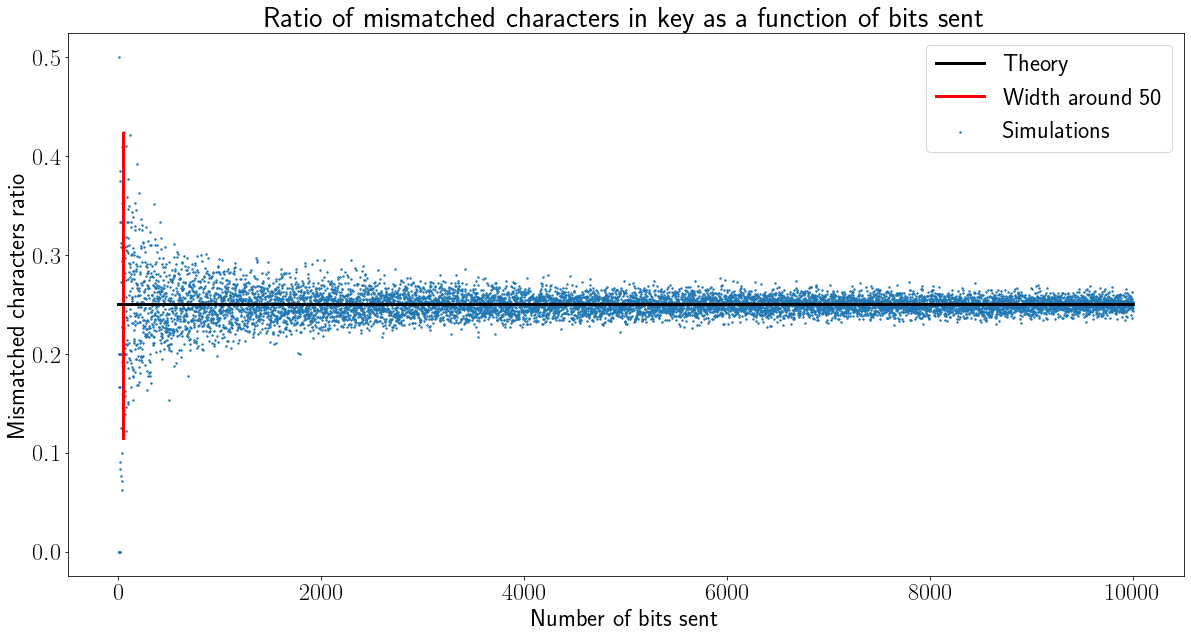

In [20]:
np.random.seed(9)
aFifty = np.array([simEve(50)[0] for i in range(360)])
pluSigma = (max(aFifty)-0.25)/3
minSigma = (0.25-min(aFifty))/3
print(f'Variance at 50 = +{pluSigma:.4f}, -{minSigma:.4f}')
print(f'For average of {sum(aFifty)/len(aFifty)}')
n=45
n=n-5
aFifty=evePerc[n:n+10]
plt.scatter(bits,evePerc, s=2, label='Simulations',zorder=-1)
plt.plot(bits, [0.25 for bit in bits], c='k', linewidth=3, label='Theory',zorder=1)
plt.plot([50,50],[min(aFifty),max(aFifty)],c='r',  linewidth=3, label='Width around 50',zorder=0)
plt.title('Ratio of mismatched characters in key as a function of bits sent')
plt.ylabel('Mismatched characters ratio')
plt.xlabel(r'Number of bits sent')
plt.legend()
plt.savefig('Distributions/PercentSimulation.pdf')
plt.savefig('Distributions/PercentSimulation.png')
plt.show()

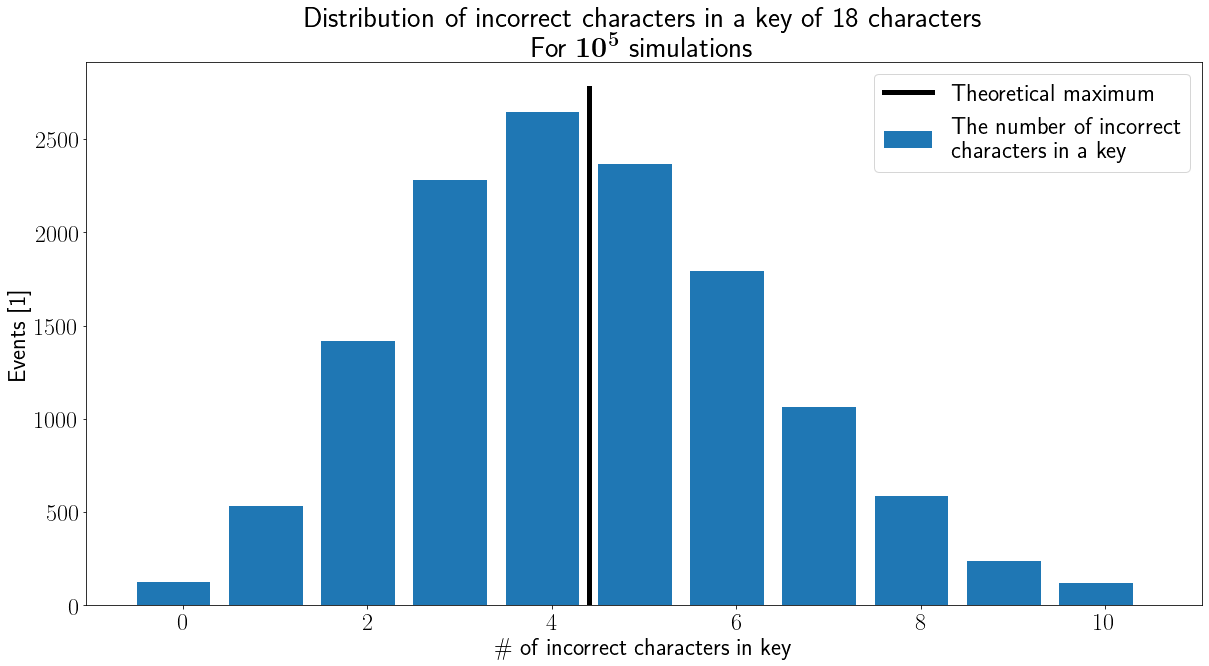

In [84]:
np.random.seed(4)
length = 50
eveHist = np.array([simEve(length)[0] for i in range(10**5) if simEve(length)[1]==18])
counts, edges, bars = plt.hist(eveHist, bins=range(0,length//3), width=0.8, zorder=0, align='left', label = 'The number of incorrect \ncharacters in a key')
plt.plot(np.full(5,length/8-0.1),np.linspace(max(counts)*1.05,0, num=5), linewidth=5, c='k', label = 'Theoretical maximum')
plt.title(f'Distribution of incorrect characters in a key of 18 characters\n'+r'For $\boldsymbol{{10}^5}$ simulations')
plt.xlabel(r'$\#$ of incorrect characters in key')
plt.ylabel('Events [1]')
plt.legend()
plt.savefig(f'Distributions/{length}Distribution.pdf')
plt.savefig(f'Distributions/{length}Distribution.png')
plt.show()

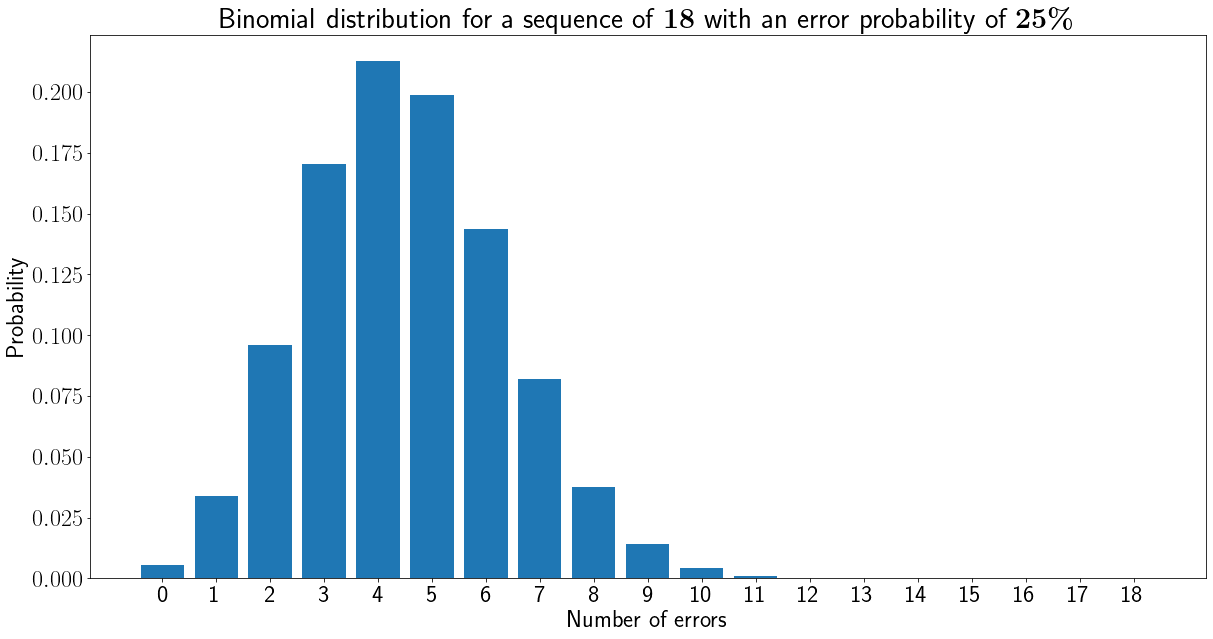

In [6]:
ns = list(range(19))
plt.bar(ns, [0.25**n*0.75**(18-n)*math.comb(18,n) for n in ns])
plt.title(r'Binomial distribution for a sequence of $\boldsymbol{18}$ with an error probability of $\boldsymbol{25\%}$')
plt.xticks(ns, ns)
plt.ylabel('Probability')
plt.xlabel('Number of errors')
plt.savefig('Distributions/BinomialDist18.pdf')
plt.savefig('Distributions/BinomialDist18.png')
plt.show()

In [85]:
counts[3]/sum(counts)*100

17.34569778048039

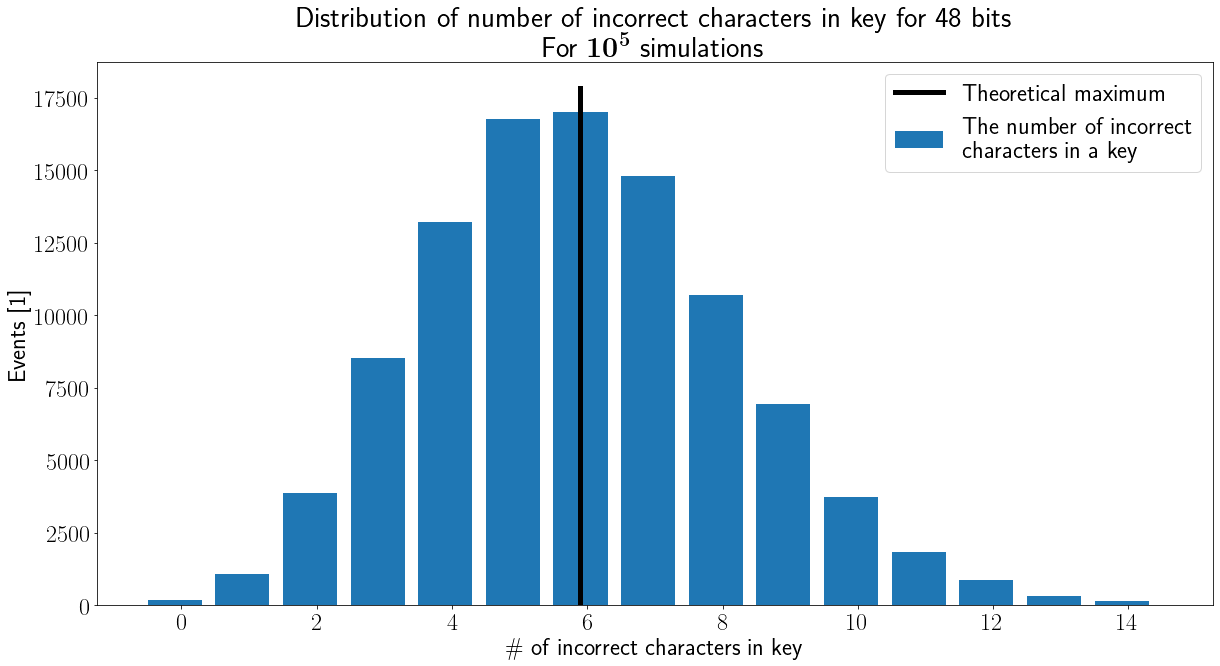

In [65]:
np.random.seed(5)
length = 48
eveHist = np.array([simEve(length) for i in range(10**5)]).T
counts, edges, bars = plt.hist(eveHist[0], bins=range(0,length//3), width=0.8, zorder=0, align='left', label = 'The number of incorrect \ncharacters in a key')
plt.plot(np.full(5,length/8-0.1),np.linspace(max(counts)*1.05,0, num=5), linewidth=5, c='k', label = 'Theoretical maximum')
plt.title(f'Distribution of number of incorrect characters in key for {length} bits\n'+r'For $\boldsymbol{{10}^5}$ simulations')
plt.xlabel(r'$\#$ of incorrect characters in key')
plt.ylabel('Events [1]')
plt.legend()
plt.savefig(f'Distributions/{length}Distribution.pdf')
plt.savefig(f'Distributions/{length}Distribution.png')
plt.show()

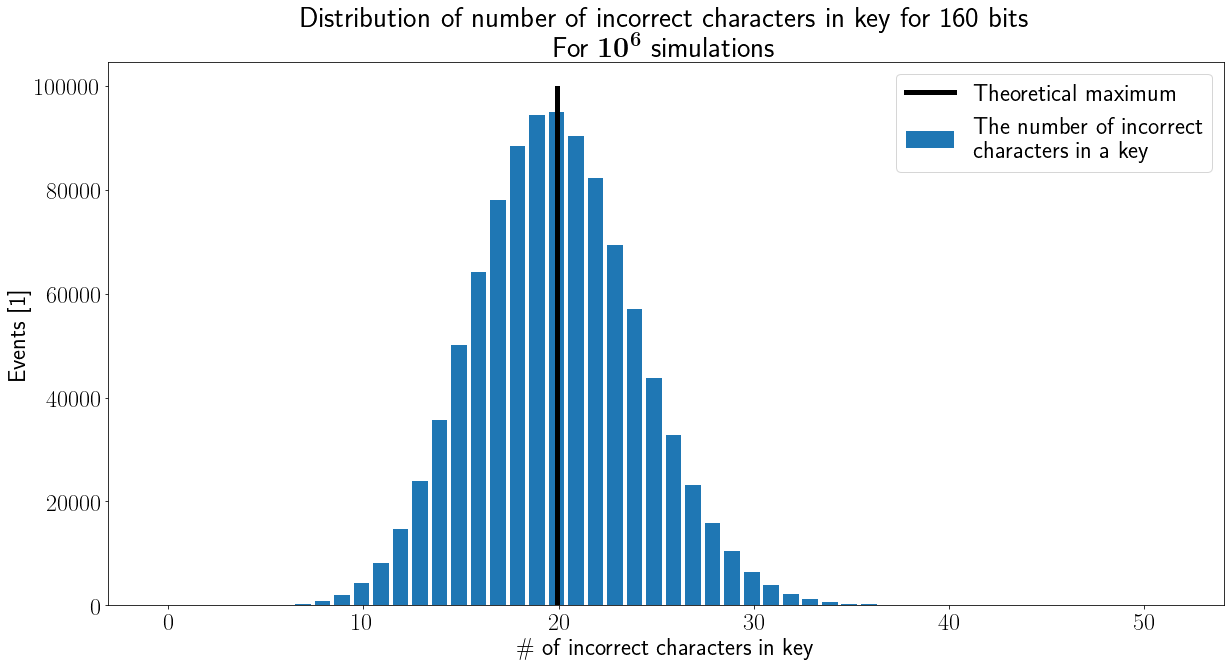

In [67]:
np.random.seed(6)
length = 8*20
eveHist = np.array([simEve(length) for i in range(10**6)]).T
counts, edges, bars = plt.hist(eveHist[0], bins=range(0,length//3), width=0.8, zorder=0, align='left', label = 'The number of incorrect \ncharacters in a key')
plt.plot(np.full(5,length/8-0.1),np.linspace(max(counts)*1.05,0, num=5), linewidth=5, c='k', label = 'Theoretical maximum')
plt.title(f'Distribution of number of incorrect characters in key for {length} bits\n'+r'For $\boldsymbol{{10}^6}$ simulations')
plt.xlabel(r'$\#$ of incorrect characters in key')
plt.ylabel('Events [1]')
plt.legend()
plt.savefig(f'Distributions/{length}Distribution.pdf')
plt.savefig(f'Distributions/{length}Distribution.png')
plt.show()